In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.externals import joblib
from time import time
%matplotlib inline

In [2]:
train_data = pd.read_csv('data_train_en.csv', sep='\s*,\s*', header=0, encoding='ascii', engine='python')

In [76]:
X = train_data.drop('class', axis=1)
y = train_data['class']
counter = 0
sum_vector_males = np.zeros(1000)
sum_vector_females = np.zeros(1000)
for i, x in X.iterrows():
    row = np.array([col for j, col in x.iteritems()])
    if y[i] == 'female':
        sum_vector_females = np.add(sum_vector_females, row)
    else:
        sum_vector_males = np.add(sum_vector_males, row)
labels = [attr for attr in X]

[1748.08392312  422.57880676  331.97173168  329.68172741  231.55985368
  209.04841586  206.17916467  118.4321402   117.39309314  101.6756099
   96.72039498   92.32848495   91.44557674   83.39780776   78.37230501
   74.80517967   74.61548821   74.5350568    72.44342752   71.98363595
   71.26879761   69.01751554   67.04605013   66.37814627   65.75098306
   65.16911306   63.16847048   62.79031966   60.74565641   60.68719571
   60.53889946   56.64426396   53.36616363   53.26302825   53.14109621
   52.65573375   51.4998515    51.47380112   51.31106552   50.47073551
   50.393183     50.3602903    50.21780984   49.19036666   48.2607936
   46.38231095   45.39472548   45.28764215   45.1655384    44.69370375]
['plate', 'ice_lolly', 'ice_cream', 'quail', 'sunglass', 'guacamole', 'harmonica', 'triceratops', 'snorkel', 'yawl', 'medicine_chest', 'pillow', 'sports_car', 'toyshop', 'hourglass', 'pajama', 'container_ship', 'megalith', 'groom', 'trombone', 'scuba_diver', 'consomme', 'brassiere', 'mailbo

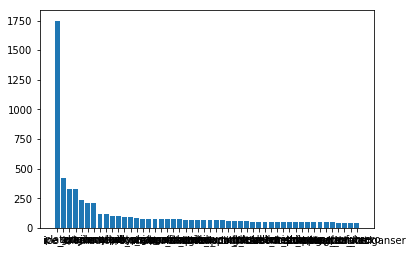

In [77]:
sum_vector_males_aux = sum_vector_males
len_top_n = 50
sorted_indexes = np.argsort(sum_vector_males_aux)[::-1]
labels_sorted = [labels[i] for i in sorted_indexes]
sum_vector_males_aux[:] = sum_vector_males_aux[sorted_indexes]
print(sum_vector_males_aux[:50])
print(labels_sorted[:50])
plt.bar(np.arange(len_top_n),sum_vector_males_aux[:len_top_n])
plt.xticks(np.arange(len_top_n), labels_sorted[:len_top_n])
plt.show()

[1530.84335734  357.10892563  309.05030301  235.96114444  227.86049781
  194.13137358  182.65815033  174.84878535  110.1648517    92.14725029
   88.71891951   85.88278655   80.22119334   80.10764028   74.67531695
   70.67617595   70.24980937   69.76468524   68.4514344    67.40762546
   67.00373212   65.31967501   65.29495384   62.721186     62.17573101
   60.98693039   59.82953853   59.66141816   59.41605839   58.91988246
   58.81403241   57.67776295   57.02483041   55.92154346   55.89304001
   55.60848391   55.54306351   54.5090343    53.93369464   53.66203443
   52.53322805   52.3211196    52.08926082   51.71414299   51.5820757
   51.49326439   50.98075185   50.85105306   50.60606181   48.52989783]
['plate', 'ice_lolly', 'ice_cream', 'sunglass', 'harmonica', 'quail', 'guacamole', 'wool', 'pillow', 'medicine_chest', 'overskirt', 'triceratops', 'boa_constrictor', 'lifeboat', 'megalith', 'toyshop', 'brass', 'scuba_diver', 'container_ship', 'carousel', 'swab', 'soccer_ball', 'mailbox', '

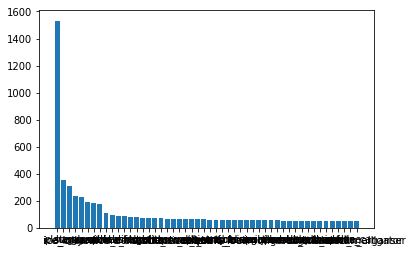

In [78]:
sum_vector_females_aux = sum_vector_females
len_top_n = 50
sorted_indexes = np.argsort(sum_vector_females_aux)[::-1]
labels_sorted = [labels[i] for i in sorted_indexes]
sum_vector_females_aux[:] = sum_vector_females_aux[sorted_indexes]
print(sum_vector_females_aux[:50])
print(labels_sorted[:50])
plt.bar(np.arange(len_top_n),sum_vector_females_aux[:len_top_n])
plt.xticks(np.arange(len_top_n), labels_sorted[:len_top_n])
plt.show()

In [83]:
males_feat = set(
)
females_feat = set(['plate', 'ice_lolly', 'ice_cream', 'quail', 'sunglass', 'guacamole', 'harmonica', 'triceratops', 'snorkel', 'yawl', 'medicine_chest', 'pillow', 'sports_car', 'toyshop', 'hourglass', 'pajama', 'container_ship', 'megalith', 'groom', 'trombone', 'scuba_diver', 'consomme', 'brassiere', 'mailbox', 'minibus', 'digital_clock', 'electric_locomotive', 'snowmobile', 'shopping_cart', 'wool', 'oil_filter', 'cock', 'thresher', 'sandbar', 'cello', 'seat_belt', 'brass', 'hot_pot', 'missile', 'American_alligator', 'stethoscope', 'diaper', 'carousel', 'tray', 'shopping_basket', 'combination_lock', 'neck_brace', 'red-breasted_merganser', 'perfume', 'sombrero'])

intersection_m_f = males_feat.intersection(females_feat)
print(len(intersection_m_f))
print(males_feat.difference(intersection_m_f))
print(females_feat.difference(intersection_m_f))

39
{'soccer_ball', 'overskirt', 'convertible', 'swab', 'plane', 'tennis_ball', 'green_snake', 'boa_constrictor', 'lampshade', 'lifeboat', 'mouse'}
{'hot_pot', 'sombrero', 'shopping_cart', 'stethoscope', 'oil_filter', 'neck_brace', 'shopping_basket', 'groom', 'cello', 'perfume', 'combination_lock'}


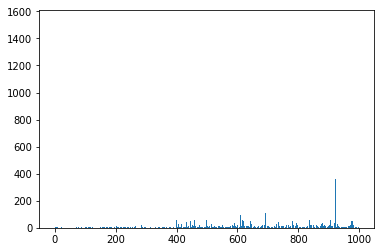

In [27]:
print()
plt.bar(np.arange(len(sum_vector_females)), sum_vector_females)
plt.show()

In [ ]:
type(X)

In [13]:
from sklearn.svm import SVC
t_start = time()
svclassifier = SVC(kernel='linear')
svclassifier.fit(X, y)
print("{} seconds training SVM".format(time() - t_start))

1098.41792678833 seconds training SVM


In [7]:
test_data = pd.read_csv('data_test_en.csv', sep='\s*,\s*', header=0, encoding='ascii', engine='python')

In [8]:
X_test = train_data.drop('class', axis=1)
y_test = train_data['class']

In [14]:
y_pred = svclassifier.predict(X_test)

In [15]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))  


[[ 7381  7611]
 [ 4425 10574]]
              precision    recall  f1-score   support

      female       0.63      0.49      0.55     14992
        male       0.58      0.70      0.64     14999

   micro avg       0.60      0.60      0.60     29991
   macro avg       0.60      0.60      0.59     29991
weighted avg       0.60      0.60      0.59     29991



In [16]:
joblib.dump(svclassifier, 'svm_kernel_lin.sav')

['svm_kernel_lin.sav']

In [19]:
import pickle
loaded_model = joblib.load('svm_kernel_lin.sav')
result = loaded_model.score(X_test, y_test)

In [20]:
print(result)

0.5986796038811644
